In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [35]:
data = pd.read_csv('C:/Users/atirkey/OneDrive/airflow/cleaned_data.csv')

In [36]:
clustering_columns = ['STATE', 'STORE_TYPE', 'AREA', 'NO_OF_TRANSACTIONS', 'TOTAL_SALES_DOLLARS']
clustering_data = data[clustering_columns]

In [37]:
label_encoders = {}
categorical_columns = ['STATE', 'STORE_TYPE', 'AREA']

In [38]:
for col in categorical_columns:
    le = LabelEncoder()
    clustering_data[col] = le.fit_transform(clustering_data[col])
    label_encoders[col] = le

C:\Users\atirkey\AppData\Local\Temp\ipykernel_2760\2180183958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data[col] = le.fit_transform(clustering_data[col])
C:\Users\atirkey\AppData\Local\Temp\ipykernel_2760\2180183958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data[col] = le.fit_transform(clustering_data[col])
C:\Users\atirkey\AppData\Local\Temp\ipykernel_2760\2180183958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [40]:
numerical_columns = ['TOTAL_SALES_DOLLARS', 'NO_OF_TRANSACTIONS']
scaler = StandardScaler()
clustering_data[numerical_columns] = scaler.fit_transform(clustering_data[numerical_columns])

C:\Users\atirkey\AppData\Local\Temp\ipykernel_2760\2065642659.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data[numerical_columns] = scaler.fit_transform(clustering_data[numerical_columns])


In [41]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)

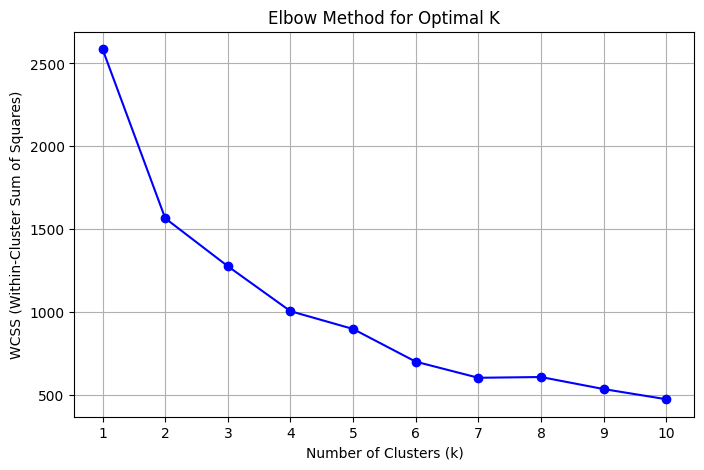

In [42]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [49]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)

C:\Users\atirkey\AppData\Local\Temp\ipykernel_2760\3226973519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_data['Cluster'] = kmeans.fit_predict(clustering_data)


In [50]:
silhouette_avg = silhouette_score(clustering_data, kmeans.labels_)
print(f"Silhouette Score for k=4: {silhouette_avg:.2f}")

Silhouette Score for k=4: 0.38


In [51]:
data['Cluster'] = clustering_data['Cluster']

In [52]:
data.to_csv('KmeansClustering1.csv', index=False)